### Goal of the Notebook
The goal of this notebook is to create and visualize the SIR model for the COVID-19 dataset that we have.

In [29]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

# Cleaned dataset for COVID-19 modeling

the file COVID_sir_flat_table.csv is generated on running the Evaluation_walkthrough_Sahil_Ratra 

Goal of the exercise is to create a dynamic dashboard, where one can select the SIR model fit for different countries

In [38]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format
df_input_large=pd.read_csv('../data/processed/COVID_sir_flat_table.csv',sep=';')
df_input_large

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,7/21/22,184224,293917,266654,45326,102209,11,8712,9465827,424400,...,967808,242502,11730,531657,10764986,672039,535,11849,328550,256217
912,7/22/22,184360,293917,266700,45326,102301,11,8736,9465827,424400,...,967808,242570,11723,531963,10766128,672039,535,11849,328550,256217
913,7/23/22,184473,293917,266772,45326,102301,11,8736,9465827,424400,...,967808,242632,11723,531963,10767200,672039,535,11849,328550,256246
914,7/24/22,184587,293917,266839,45326,102301,11,8736,9507562,424400,...,967808,242691,11723,532902,10767948,672039,535,11849,328550,256254


# Simulative approach to calculate SIR curves
## Fitting data to a model

Goal is to fit a data model (SIR) model to obtain the parameters
beta and gamma

step one: always start on simulative / constructive data
step two: cross check if the innerlogic of your parameter fitting is correct

In [32]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [33]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI


# Fitting the parameters of SIR model
the SIR model is assuming a very simplistic curve
however we can find situations (time windows) where the model might apply

In [34]:
begin = 40
end = 200

In [35]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_covid = pd.read_csv(url, ',')
df_covid.head()

/home/blitzy/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


start infected: 191
cumulative sum of invected after period 237402
Number of days 160
N0 50000000
standard deviation errors :  [0.01684904 0.01669444]  start infect: 191
Optimal parameters: beta = 0.6762549543704818  and gamma =  0.6063637103646933


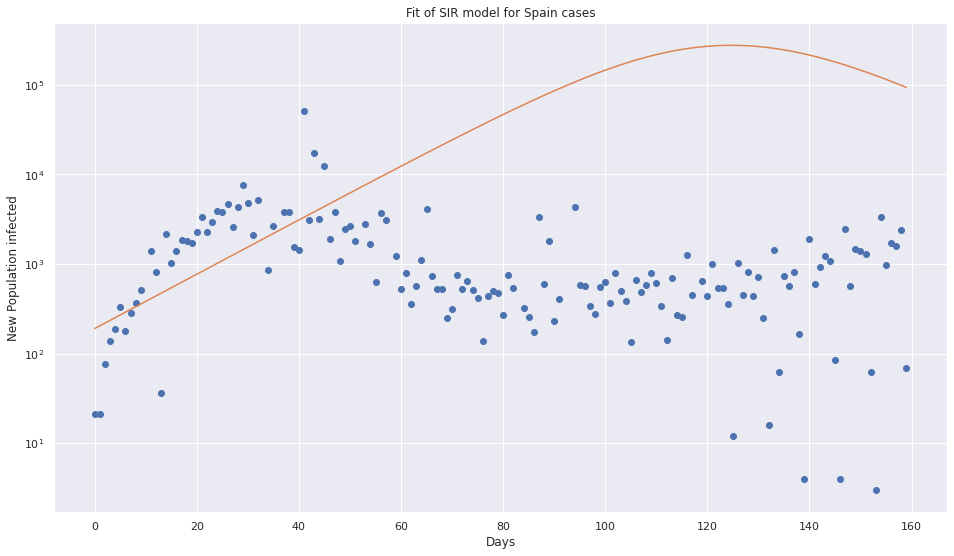

Optimal parameters: beta = 0.6762549543704818  and gamma =  0.6063637103646933
Basic Reproduction Number R0  1.115262907082208
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible.


In [40]:
ydata_sp = np.array(df_input_large['France'][begin:end])
t_sp=np.arange(len(ydata_sp))
N0_sp=50000000

I0_sp=ydata_sp[0]
S0_sp=N0_sp-I0_sp
R0_sp=0
print('start infected:',I0_sp)
print('cumulative sum of invected after period',ydata_sp[-1])
print('Number of days',len(ydata_sp))
print('N0',N0_sp)

#beta_It = 0.5
#gamma_It = 0.2
def SIR_model_t_sp(SIR,t_sp,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0_sp       #S*I is the 
    dI_dt=beta*S*I/N0_sp-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

def fit_odeint_sp(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t_sp, (S0_sp, I0_sp, R0_sp), t_sp, args=(beta, gamma))[:,1] # we only would like to get dI

popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
perr_sp = np.sqrt(np.diag(pcov_sp))
    
print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

# get the final fitted curve / predict the outcome 
fitted_sp=fit_odeint_sp(t_sp, *popt_sp)

plt.semilogy(t_sp,np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]), 'o')
plt.semilogy(t_sp, fitted_sp)

plt.title("Fit of SIR model for Spain cases")
plt.ylabel("New Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])
print("Basic Reproduction Number R0 " , popt_sp[0]/ popt_sp[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible.")

In [41]:
df_input_large.to_csv('../data/processed/COVID_sir_fitted_table.csv', sep=';',index=False)


In [53]:
# %load src/visualization/visualize.py
import pandas as pd
import numpy as np
import dash
import io
import base64

dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os
print(os.getcwd())
    

fig = go.Figure()


app = dash.Dash()
app.layout = html.Div([

    dcc.Markdown('''
    #  SIR Modeling on Covid-19 Data
    Initial records from 40-200 days are taken into consideration since the cases were registered 
    the first wave and can be represented well using the SIR model
    '''),

    dcc.Markdown('''
    ## Select Country for visualization
    '''),


    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': each,'value':each} for each in df_input_large.columns[1:].unique()],
        value=['Germany', 'India', 'US'], # which are pre-selected
        multi=True
    ),

    dcc.Graph(figure=fig, id='main_window_slope')
    #html.Iframe(
    #id = 'main_window_slope',
    #value = None,
    #style = {}
    #)
])

#N0=0
#I0=0
#S0=0
#R0=0
#t = 0
@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    #plt.semilogy(t, ydata, 'o')
    #plt.semilogy(t, fitted)
    #traces = []
   # print(f'country {country}')
   # print(f'type(country) {type(country)}')
    traces = []
    for country in country_list:
        ydata_sp = np.array(df_input_large[country][begin:end])
        t_sp=np.arange(len(ydata_sp))
    
        if(country == 'US'):
            country = 'United States'
        elif(country == 'Korea, South'):
            country = 'South Korea'
        #print(df_covid['location'].unique())
        df_country = df_covid[df_covid['location'] == country]
        population = int(df_country['population'].iloc[0] * 0.1)
        #print(f'population {population}')
        global I0_sp, S0_sp, R0_sp, N0_sp
        N0_sp=population

        I0_sp=ydata_sp[0]
        S0_sp=N0_sp-I0_sp
        R0_sp=0
    
        popt_sp, pcov_sp = optimize.curve_fit(fit_odeint_sp, t_sp, ydata_sp)
        perr_sp = np.sqrt(np.diag(pcov_sp))
    
        print('standard deviation errors : ',str(perr_sp), ' start infect:',ydata_sp[0])
        print("Optimal parameters: beta =", popt_sp[0], " and gamma = ", popt_sp[1])

        # get the final fitted curve / predict the outcome 
        fitted_sp=fit_odeint_sp(t_sp, *popt_sp)
    
        traces.append(dict(x=t_sp,
                       y=np.ediff1d(ydata_sp, to_begin=ydata_sp[1]-ydata_sp[0]),
                       #y=data_dict[country][0],
                                #y=fitted,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='markers',
                                opacity=0.9,
                                name='Cases in '+ country
                                #log_x=True
                        ))
        traces.append(dict(x=t_sp,#y=np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]),
                                y=fitted_sp,
                                #y = [np.ediff1d(ydata, to_begin=ydata[1]-ydata[0]), fitted], 
                                mode='lines',
                                opacity=0.9,
                                name='SIR fitted Curve ' + country 
                                
                        ))
    my_yaxis={'type':"log",
               'title':'New Population infected'
              }

    return {
            'data': traces,
            'layout': dict (
                width=1280,
                height=720,

                xaxis={'title':'Days',
                        'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                      },
                
                #log_x=True

                yaxis=my_yaxis
        )
    }
    
    
    

if __name__ == '__main__':

    app.run_server(debug=True, use_reloader=False)

/home/blitzy/Enterprise Data Science/notebooks
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
standard deviation errors :  [0.0074669 0.007319 ]  start infect: 150
Optimal parameters: beta = 0.3067281948914603  and gamma =  0.

/tmp/ipykernel_10271/193410551.py:30: RuntimeWarning:

overflow encountered in double_scalars

/tmp/ipykernel_10271/193410551.py:31: RuntimeWarning:

overflow encountered in double_scalars

/tmp/ipykernel_10271/193410551.py:32: RuntimeWarning:

overflow encountered in double_scalars



standard deviation errors :  [0.0075336  0.00733655]  start infect: 5
Optimal parameters: beta = 0.5886452765909875  and gamma =  0.49585591702350373
standard deviation errors :  [0.00339869 0.0031656 ]  start infect: 55
Optimal parameters: beta = 0.19240241612328698  and gamma =  0.10047457253093982
standard deviation errors :  [0.0074669 0.007319 ]  start infect: 150
Optimal parameters: beta = 0.3067281948914603  and gamma =  0.2330965285090722
standard deviation errors :  [0.0075336  0.00733655]  start infect: 5
Optimal parameters: beta = 0.5886452765909875  and gamma =  0.49585591702350373
standard deviation errors :  [0.0074669 0.007319 ]  start infect: 150
Optimal parameters: beta = 0.3067281948914603  and gamma =  0.2330965285090722
standard deviation errors :  [0.0075336  0.00733655]  start infect: 5
Optimal parameters: beta = 0.5886452765909875  and gamma =  0.49585591702350373
standard deviation errors :  [0.00356833 0.00378436]  start infect: 191
Optimal parameters: beta = 0